# Analyzing Training Set

In [4]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [18]:
from IPython.display import set_matplotlib_formats
from matplotlib import rc

set_matplotlib_formats('retina', quality=100)

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})


In [19]:
data_dir = '../data/processed/output20/train/'
figures_dir = '../output/figures/'

In [20]:
categories = []
img_categories = []
n_train = []


for d in os.listdir(data_dir):
    if os.path.isdir(data_dir + d):
        if len(os.listdir(data_dir + d)) > 0:
            categories.append(d)
            train_imgs = os.listdir(data_dir + d)
            n_train.append(len(train_imgs))

cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       }).sort_values('category')


cat_df.sort_values('n_train', ascending=False, inplace=True)


## Plot distribution

/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


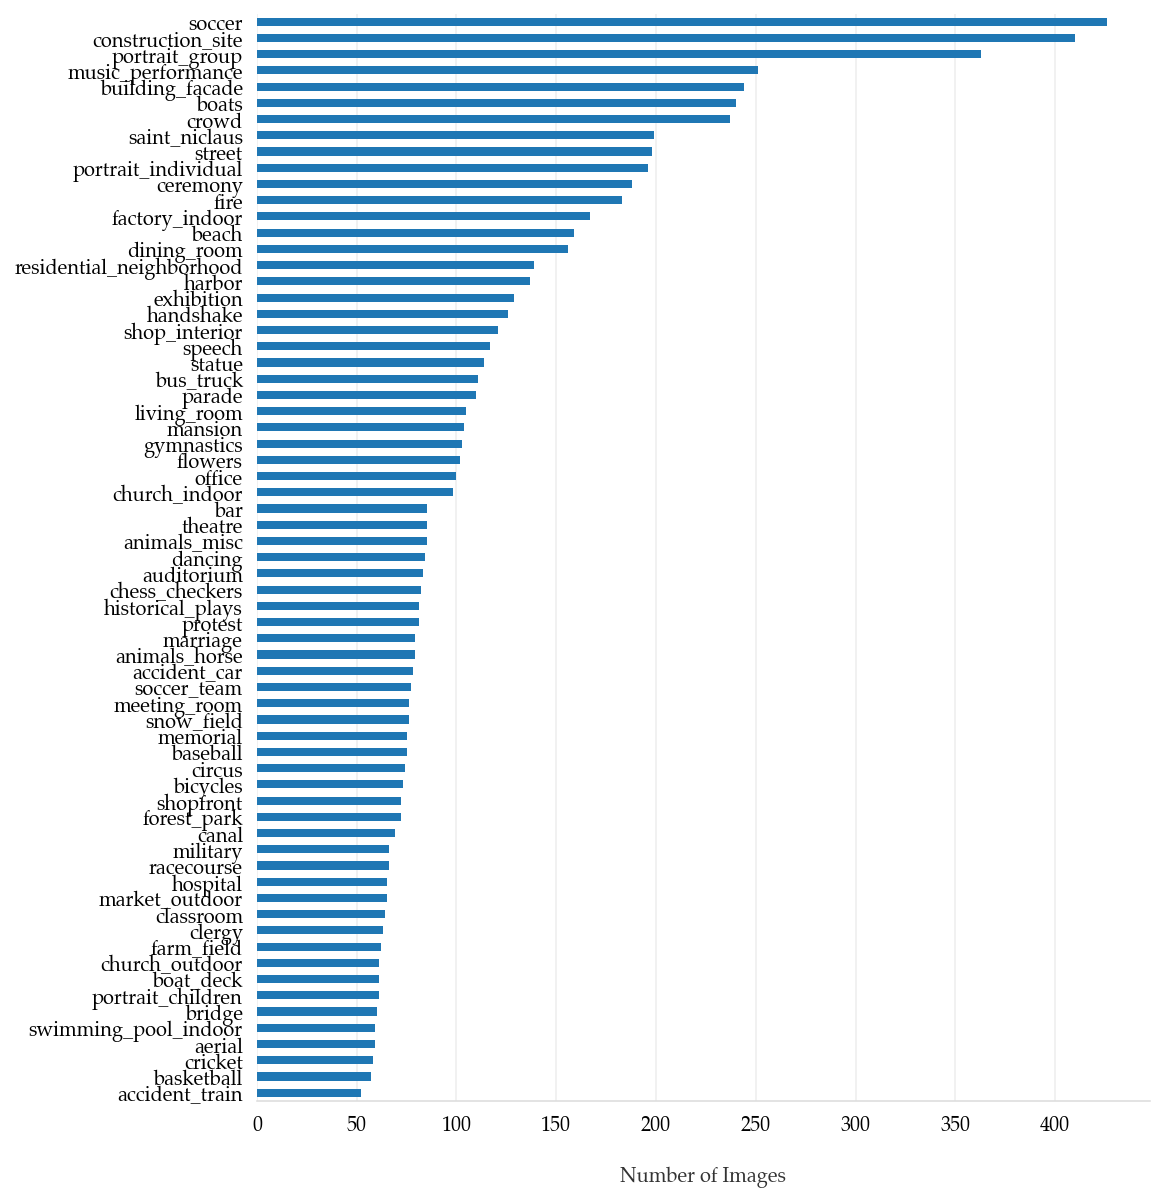

In [33]:
ax = cat_df[cat_df['n_train'] > 50].sort_values('n_train').plot(x='category', y='n_train', kind='barh', figsize=(8,10))
ax.set_xlabel('Number of Images', labelpad=15, color='#333333')

y_axis = ax.axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')


ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#EEEEEE')
ax.yaxis.grid(False)

#plt.tight_layout()
ax.get_legend().remove()
plt.savefig(figures_dir + 'categories.png', dpi=300,  bbox_inches='tight')
plt.show()